In [43]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tqdm as tqdm

#Scaling
from sklearn.preprocessing import StandardScaler

#Selecting features
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA

#For sampling
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek


#Spliting the dataset
from sklearn.model_selection import train_test_split

#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#For KFold
from sklearn.model_selection import RepeatedStratifiedKFold

#Confusion metrics
from sklearn.metrics import confusion_matrix,recall_score, f1_score, accuracy_score, precision_score,roc_auc_score

#GridSearch
from sklearn.model_selection import GridSearchCV



In [44]:
# import dataset
df_1 = pd.read_csv('_BANKRUPTCY PREDICTION .csv')
# set the max columns to none
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_1.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256970e-04   
1                               0.781506             2.897850e-04   
2                               0.780284             2.361300e-04   
3                               0.781241             1.078890e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                                  0.180581   
3                  0.154187               

In [45]:
df_1.shape

(6819, 95)

### Pre-Processing
### Step 1 : Handling Missing Value
### Step 2 : Handling Encoding Concept
### Step 3 : Handling Outlier
### Step 4 : To do Feature Scaling 
### Step 5 : Handling Imbalance Dataset 

In [5]:
# Step 1 : Handling Missing Value
df_1.isnull().sum().sum()

0

In [6]:
#Step 2: Encoding
columns  = df_1.columns
for i in columns:
    print( i, ':',  df_1[i].nunique())

 ROA(C) before interest and depreciation before interest : 3333
 ROA(A) before interest and % after tax : 3151
 ROA(B) before interest and depreciation after tax : 3160
 Operating Gross Margin : 3781
 Realized Sales Gross Margin : 3788
 Operating Profit Rate : 3376
 Pre-tax net Interest Rate : 3789
 After-tax net Interest Rate : 3604
 Non-industry income and expenditure/revenue : 2551
 Continuous interest rate (after tax) : 3617
 Operating Expense Rate : 2966
 Research and development expense rate : 1536
 Cash flow rate : 5557
 Interest-bearing debt interest rate : 1080
 Tax rate (A) : 2488
 Net Value Per Share (B) : 2278
 Net Value Per Share (A) : 2285
 Net Value Per Share (C) : 2284
 Persistent EPS in the Last Four Seasons : 1358
 Cash Flow Per Share : 1545
 Revenue Per Share (Yuan � : 3807
 Operating Profit Per Share (Yuan � : 1236
 Per Share Net profit before tax (Yuan � : 1522
 Realized Sales Gross Profit Growth Rate : 5583
 Operating Profit Growth Rate : 6249
 After-tax Net Profi

In [7]:
df_1[' Liability-Assets Flag'].unique()


array([0, 1], dtype=int64)

In [8]:
df_1[' Liability-Assets Flag'].value_counts()


0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64

In [9]:
df_1[' Liability-Assets Flag'] = df_1[' Liability-Assets Flag'].astype('category')
df_1[' Liability-Assets Flag'] = df_1[' Liability-Assets Flag'].cat.codes

df_1 = pd.get_dummies(df_1, columns=[' Liability-Assets Flag'])

df_1 = df_1.drop([' Liability-Assets Flag_0'], axis=1)

In [101]:
df_1.head(1)
#Operating Expense Rate - expense values are high hence always do scaling

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          

    ROA(A) before interest and % after tax  \
0                                 0.424389   

    ROA(B) before interest and depreciation after tax  \
0                                            0.40575    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985                 0.000126   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                   0.14795                   0.14795   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                   0.14795                                  0.169141   

    Cash Flow Per Share   Revenue Per Share (Yuan �  \
0              0.311664                     0.01756   

    Operating Profit Per Share (Yuan �  \
0                             0.095921   

    Per Share Net profit before tax (Yuan �  \
0                                  0.138736   

    Realized Sales Gross Profit Growth Rate   Operating Profit Growth Rate  \
0                                  0.022102                       0.848195   

    After-tax Net Profit Growth Rate   Regular Net Profit Growth Rate  \
0                           0.688979                         0.688979   

    Continuous Net Profit Growth Rate   Total Asset Growth Rate  \
0                            0.217535              4.980000e+09   

    Net Value Growth Rate   Total Asset Return Growth Rate Ratio  \
0                0.000327                                 0.2631   

    Cash Reinvestment %   Current Ratio   Quick Ratio  \
0              0.363725        0.002259      0.001208   

    Interest Expense Ratio   Total debt/Total net worth   Debt ratio %  \
0                 0.629951                     0.021266       0.207576   

    Net worth/Assets   Long-term fund suitability ratio (A)  \
0           0.792424                               0.005024   

    Borrowing dependency   Contingent liabilities/Net worth  \
0               0.390284                           0.006479   

    Operating profit/Paid-in capital   Net profit before tax/Paid-in capital  \
0                           0.095885                                0.137757   

    Inventory and accounts receivable/Net value   Total Asset Turnover  \
0                                      0.398036               0.086957   

    Accounts Receivable Turnover   Average Collection Days  \
0                       0.001814                  0.003487   

    Inventory Turnover Rate (times)   Fixed Assets Turnover Frequency  \
0                          0.000182                          0.000117   

    Net Worth Turnover Rate (times)   Revenue per person  \
0                          0.032903             0.034164   

    Operating profit per person   Allocation rate per person  \
0                      0.392913                     0.037135   

    Working Capital to Total Assets   Quick Assets/Total Assets  \
0                          0.672775                    0.166673   

    Current Assets/Total Assets   Cash/Total Assets  \
0                      0.190643            0.004094   

    Quick Assets/Current Liability   Cash/Current Liability  \
0                         0.001997                 0.000147   

    Current Liability to Assets   Ope

0    6599
1     220
Name: Bankrupt, dtype: int64


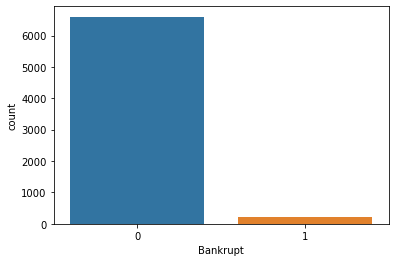

In [11]:
#Plotting the labels count
print(df_1["Bankrupt"].value_counts())
plt.figure()
sns.countplot(x = 'Bankrupt',data= df_1 )
plt.show()

In [46]:
df_1.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000          
mean                                            0.505180          
std                                             0.060686          
min                                             0.000000          
25%                                             0.476527          
50%                                             0.502706          
75%                                             0.535563          
max                                             1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                                 0.000000             0.000000e+00   
25%                                 0.781567             1.5668

# Scaling required

1) Features - Quick Assets/Current Liability,  Cash/Current Liability and many more had more difference between min and max.
2) Scaling performed each time while building model

In [51]:
df_1[' Cash/Current Liability'].describe()
#scaling required as there is much difference between min and max value 


count    6.819000e+03
mean     3.715999e+07
std      5.103509e+08
min      0.000000e+00
25%      1.973008e-03
50%      4.903886e-03
75%      1.280557e-02
max      9.650000e+09
Name:  Cash/Current Liability, dtype: float64

In [12]:
print(len(df_1[df_1['Bankrupt']==0])/len(df_1)*100)
print(len(df_1[df_1['Bankrupt']==1])/len(df_1)*100)


96.77372048687491
3.2262795131250916


# Correlation

In [13]:
#cor_matrix = df_1.corr().abs()
cor_matrix = df_1.corr().abs()

cor_matrix.style.background_gradient(sns.light_palette('red', as_cmap=True))

In [14]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool)) #upper triangle of the correlation matrix
#lower_tri = cor_matrix.where(np.tril(np.ones(cor_matrix.shape),k=1).astype(np.bool)) #upper triangle of the correlation matrix


In [15]:
cor_matrix.shape

(95, 95)

In [16]:
Higly_correlated_columns = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
Higly_correlated_columns

[' ROA(B) before interest and depreciation after tax',
 ' Realized Sales Gross Margin',
 ' After-tax net Interest Rate',
 ' Continuous interest rate (after tax)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Per Share Net profit before tax (Yuan �',
 ' Regular Net Profit Growth Rate',
 ' Net worth/Assets',
 ' Operating profit/Paid-in capital',
 ' Net profit before tax/Paid-in capital',
 ' Current Liability to Liability',
 ' Current Liability to Equity',
 ' Net Income to Total Assets',
 ' Gross Profit to Sales',
 ' Liability to Equity']

# Exploratory Data Analysis

### Plotting the Selected columns taken from mutual_info_classif to analyse the data

In [4]:
x = df_1.drop(['Bankrupt'], axis=1)
y = df_1['Bankrupt']

In [10]:
imp_f = pd.DataFrame(rf.feature_importances_)
imp_f
imp_f = pd.concat([pd.DataFrame(x.columns),imp_f],axis=1)
imp_f.columns = ['Features','imp']
imp_f
#sort decending order
imp_f = imp_f.sort_values(by='imp',ascending=False)
imp_f = imp_f.head(30)
features = list(imp_f['Features'])
features

30

In [11]:
importances

array([3.21072995e-02, 3.66926323e-02, 3.10122827e-02, 1.45557918e-02,
       1.48669374e-02, 1.82661123e-02, 2.97323782e-02, 2.92704480e-02,
       2.72725622e-02, 3.57531707e-02, 0.00000000e+00, 0.00000000e+00,
       1.36773762e-02, 1.50704870e-03, 2.07781366e-02, 3.15310624e-02,
       2.96114025e-02, 2.98161417e-02, 4.16272198e-02, 8.05582824e-03,
       1.05805381e-03, 1.96406015e-02, 3.73681757e-02, 8.90722576e-03,
       5.46025924e-03, 1.30187964e-02, 1.22693690e-02, 8.65193387e-03,
       1.35949049e-02, 4.48921057e-03, 9.80946153e-03, 1.67947115e-03,
       2.21114991e-02, 2.37177773e-02, 3.48252123e-02, 3.25045985e-02,
       3.48128268e-02, 3.39239341e-02, 1.03828062e-02, 3.95685438e-02,
       2.38890982e-03, 2.19966131e-02, 3.94211418e-02, 4.09700112e-03,
       7.33332121e-03, 3.72481584e-04, 1.01056902e-03, 8.60698327e-04,
       0.00000000e+00, 0.00000000e+00, 6.21535209e-05, 1.80079691e-02,
       5.83462392e-03, 2.32585336e-02, 4.89525359e-03, 0.00000000e+00,
      

In [13]:
feature_list

[' Persistent EPS in the Last Four Seasons',
 " Net Income to Stockholder's Equity",
 ' Borrowing dependency',
 ' Net profit before tax/Paid-in capital',
 ' Per Share Net profit before tax (Yuan �',
 ' Net Income to Total Assets',
 ' ROA(A) before interest and % after tax',
 ' Continuous interest rate (after tax)',
 ' Interest Expense Ratio',
 ' Debt ratio %',
 ' Equity to Liability',
 ' Net worth/Assets',
 ' Interest Coverage Ratio (Interest expense to EBIT)',
 ' Liability to Equity',
 ' Retained Earnings to Total Assets',
 ' Degree of Financial Leverage (DFL)',
 ' Total debt/Total net worth',
 ' ROA(C) before interest and depreciation before interest',
 ' Net Value Per Share (B)',
 ' ROA(B) before interest and depreciation after tax',
 ' Total income/Total expense',
 ' Net Value Per Share (C)',
 ' Pre-tax net Interest Rate',
 ' Net Value Per Share (A)',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Current Liabilities/Equity',
 ' Current Liabili

In [14]:
analyse_data = df_1[feature_list]

In [15]:

analyse_data['Bankrupt'] = df_1['Bankrupt']

In [16]:
len(analyse_data.columns)

31

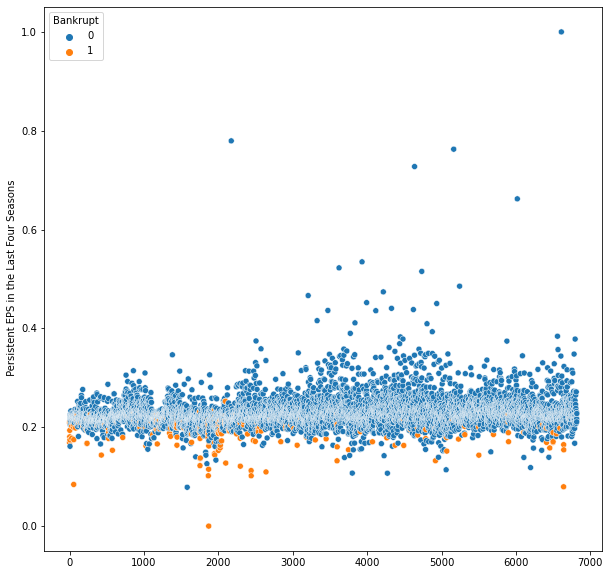

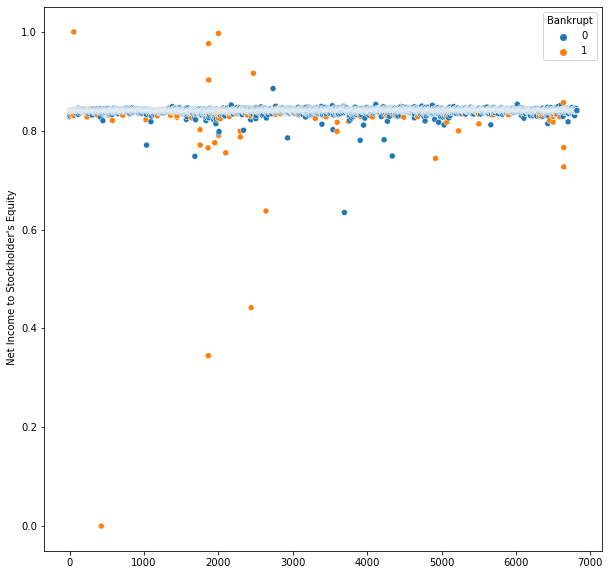

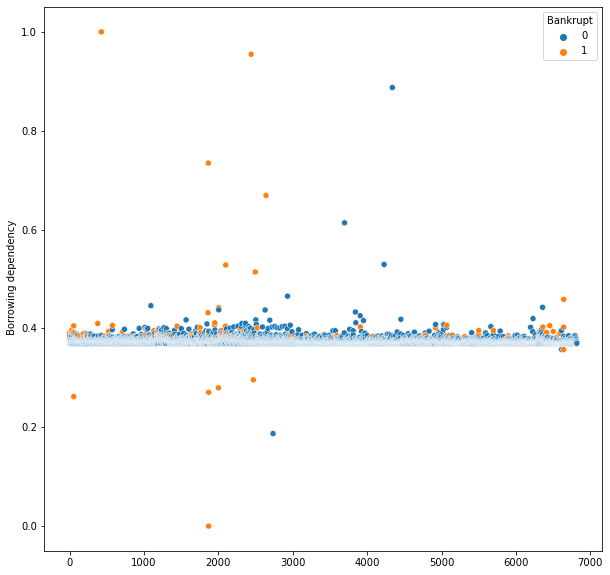

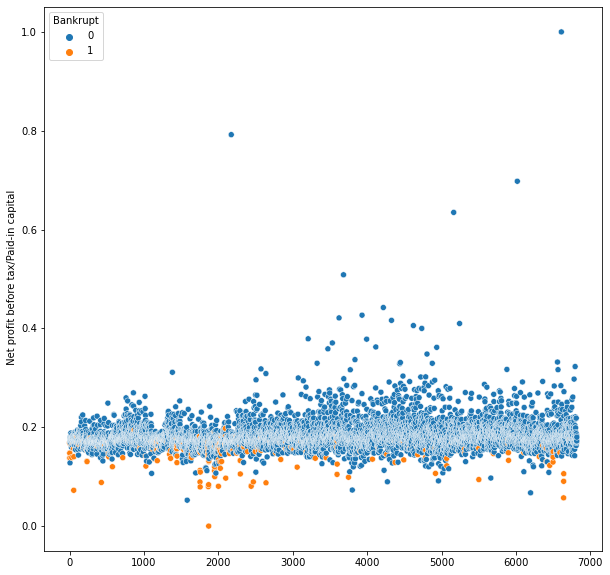

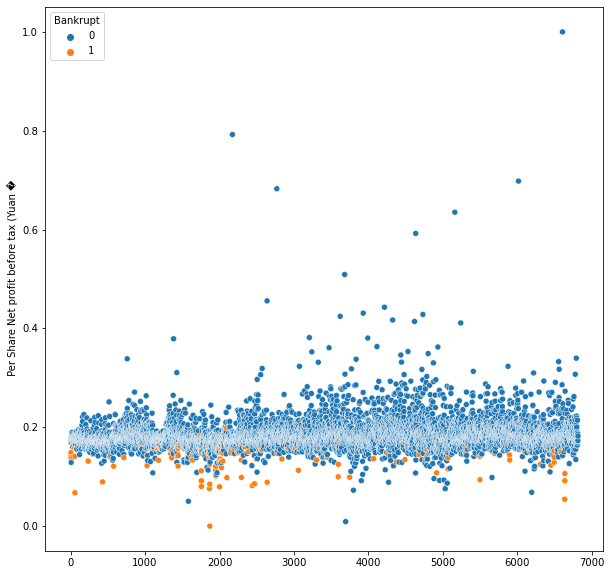

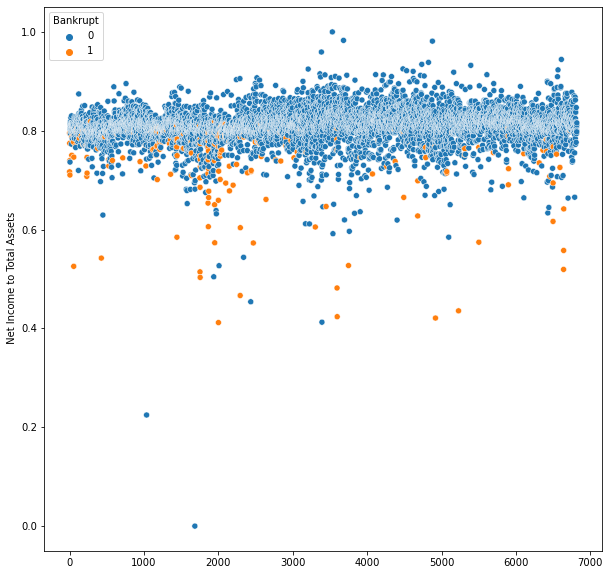

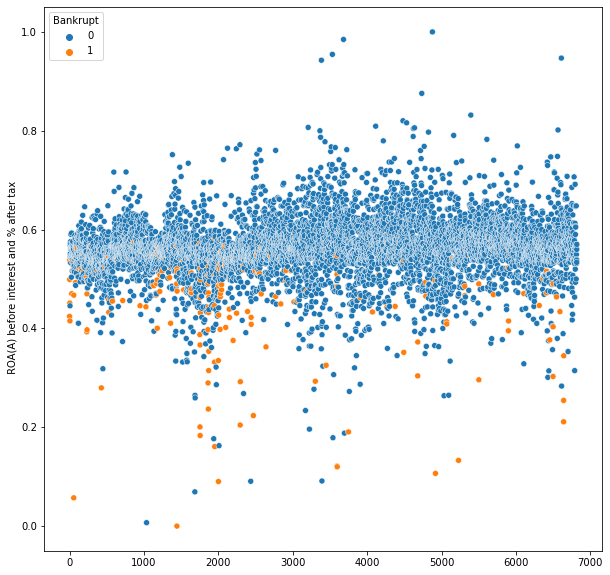

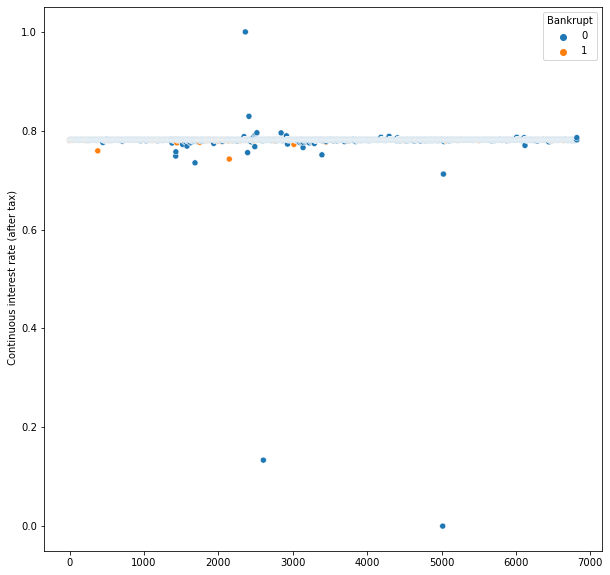

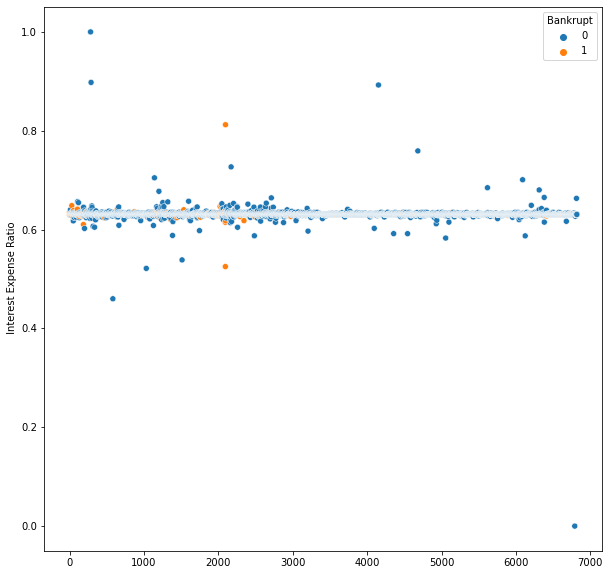

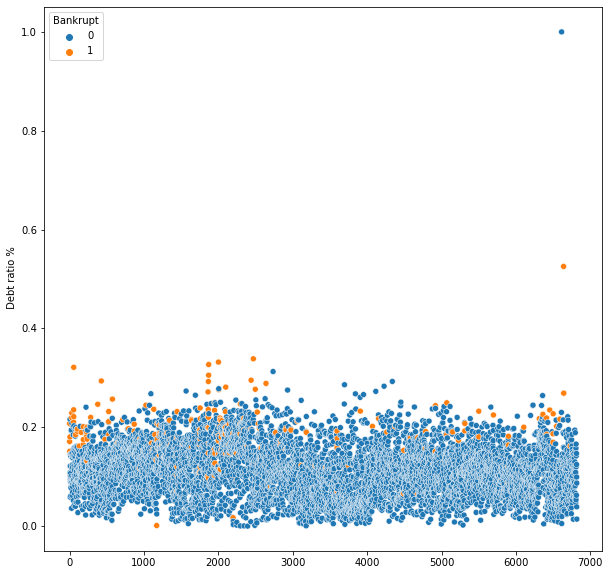

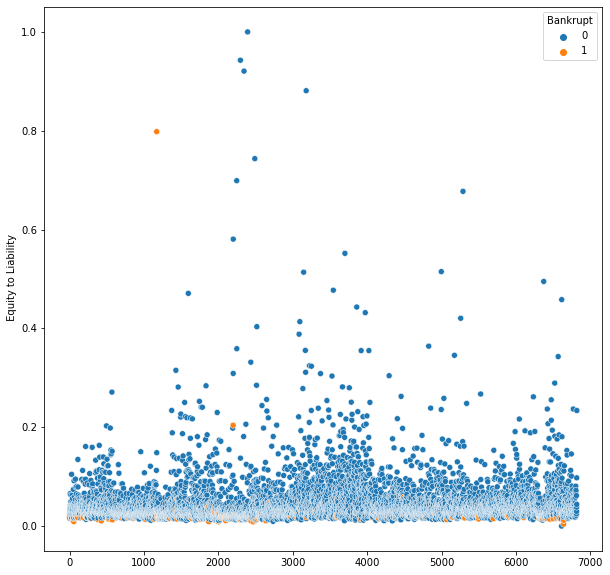

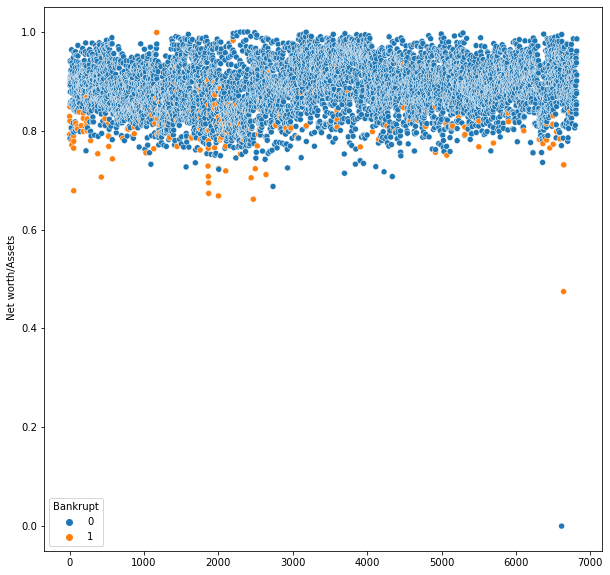

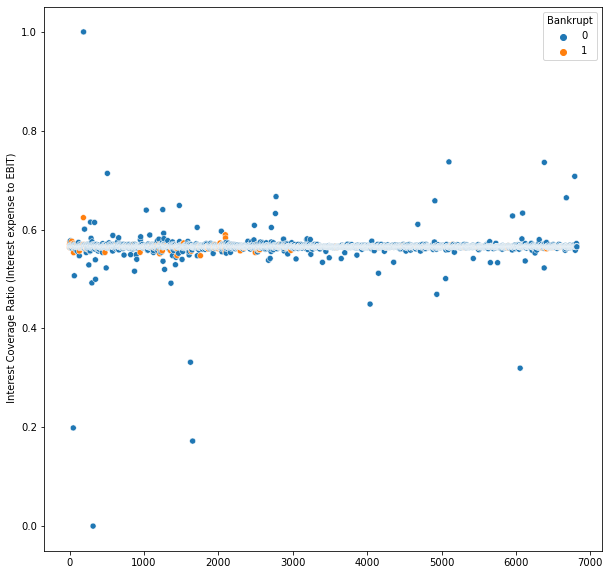

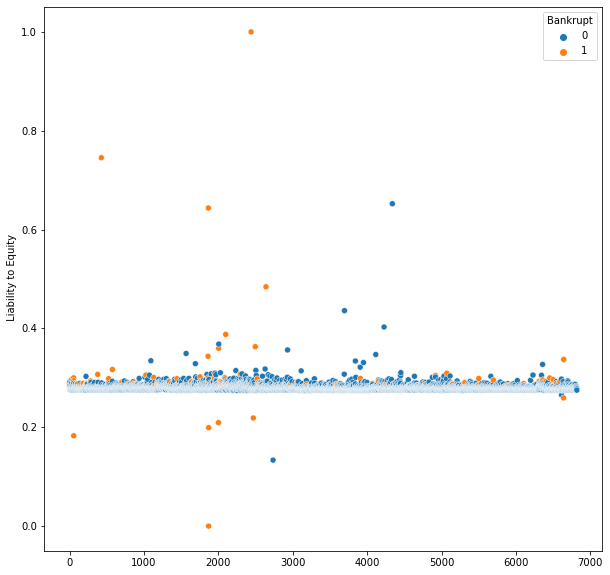

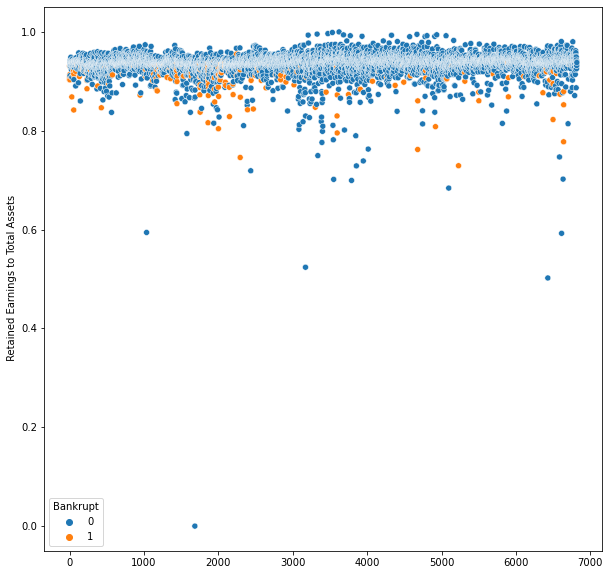

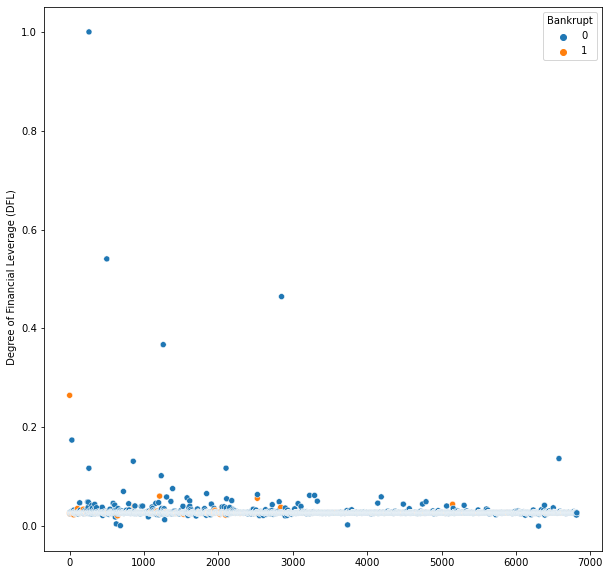

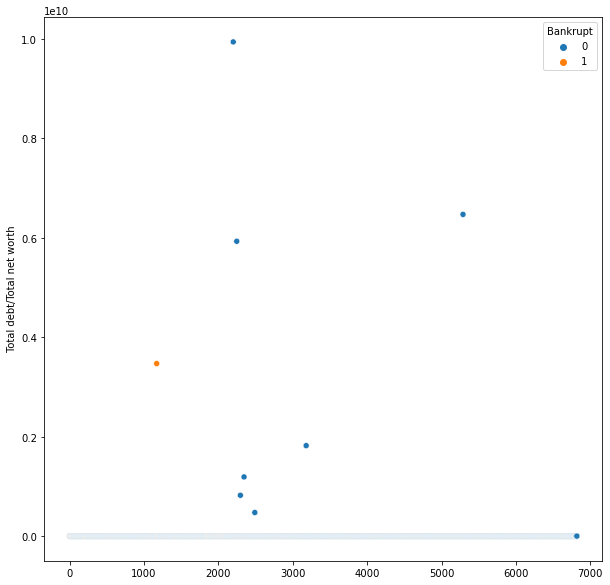

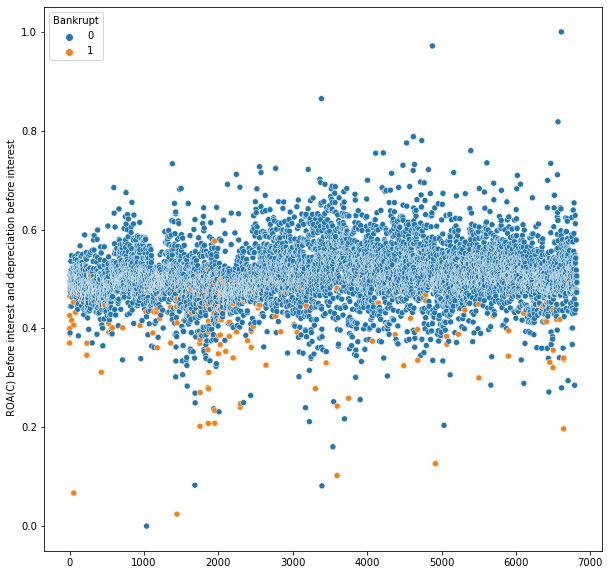

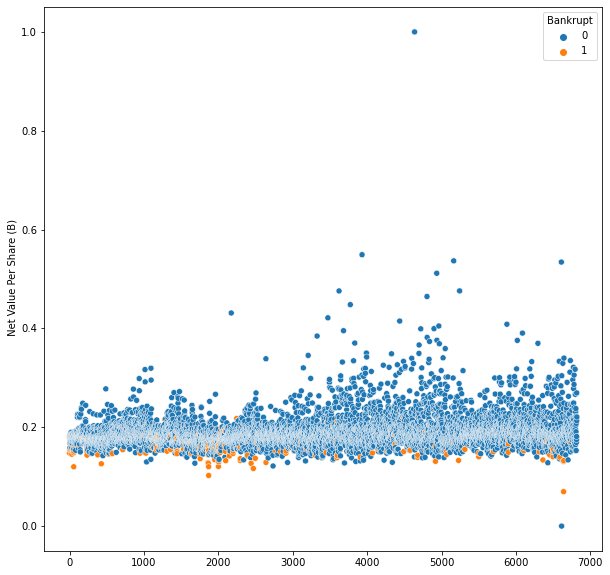

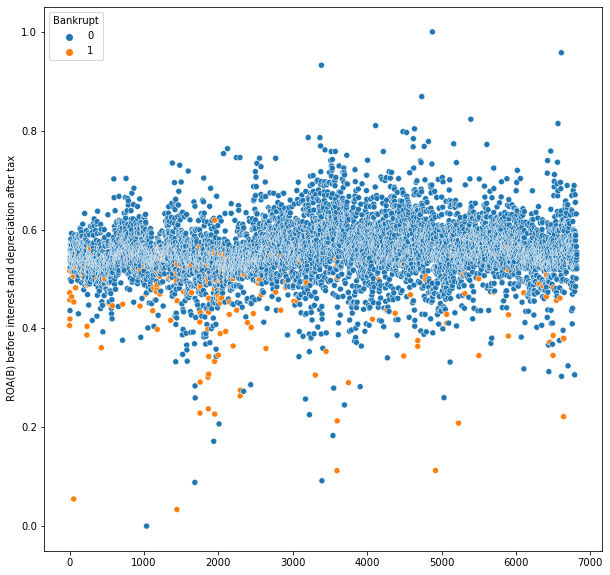

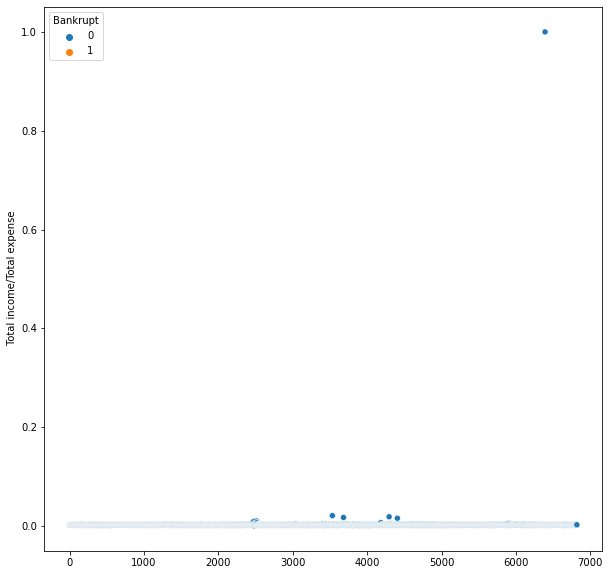

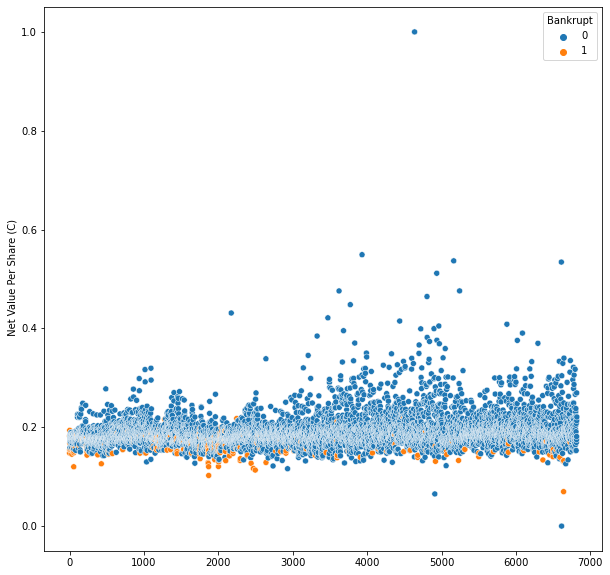

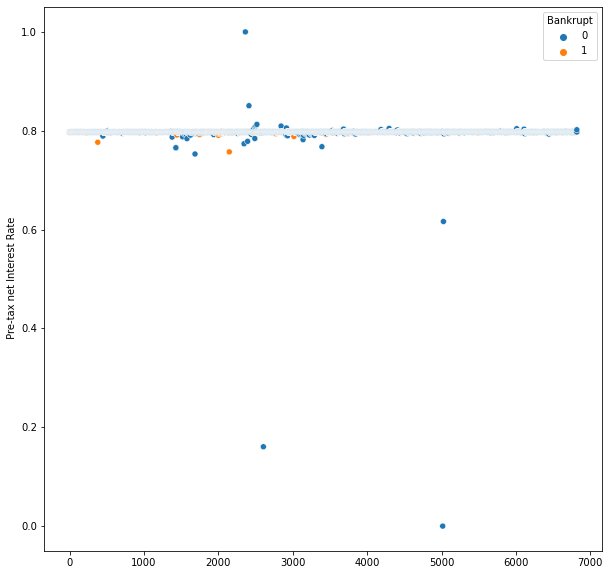

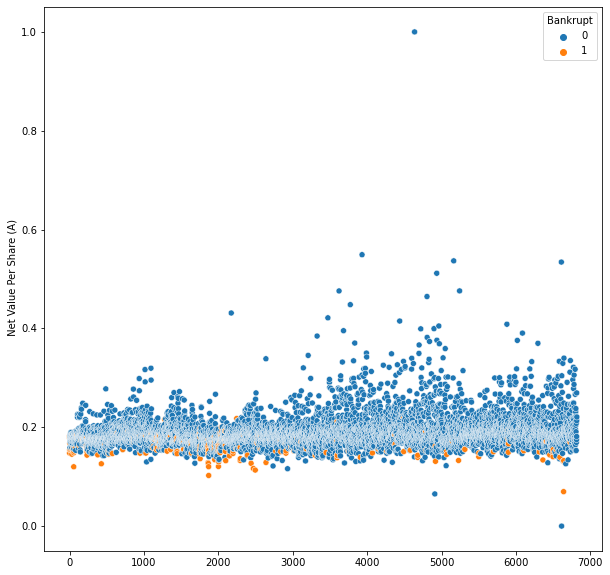

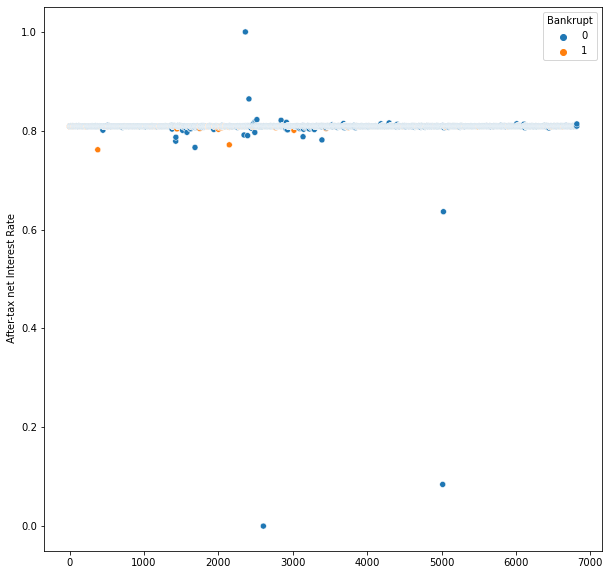

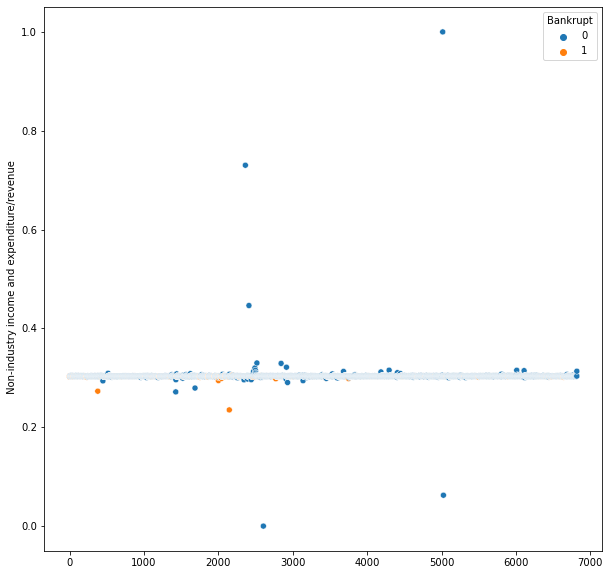

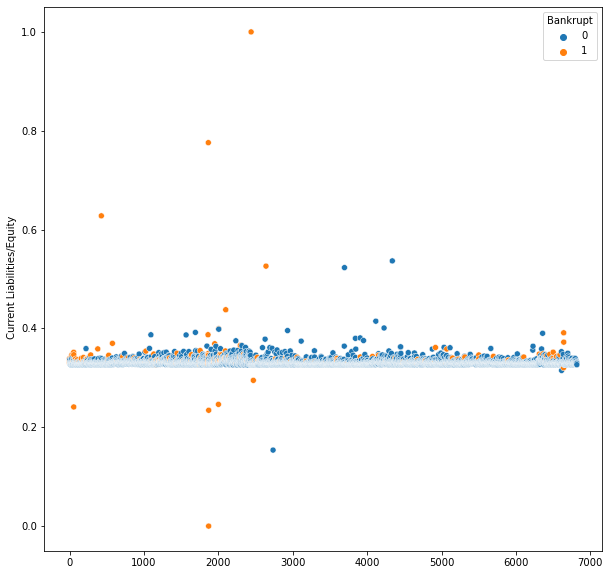

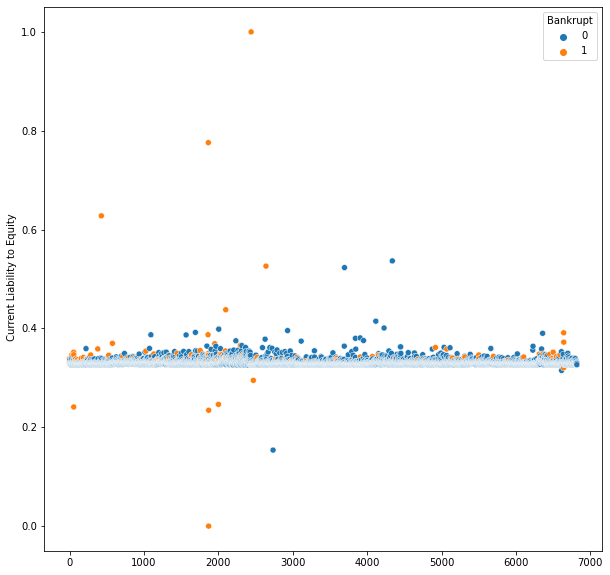

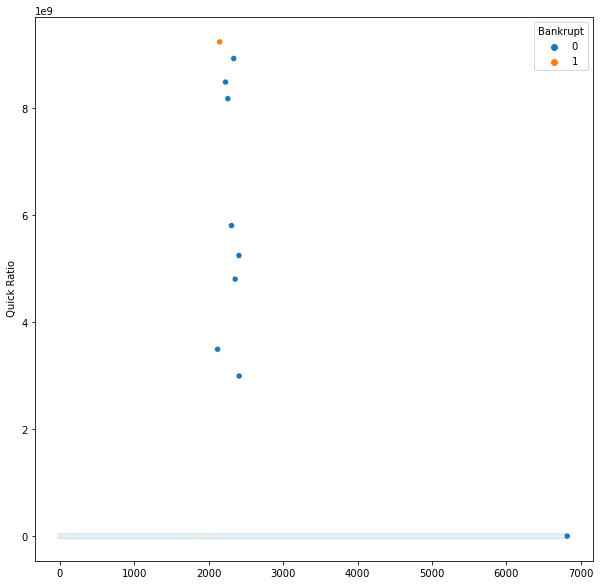

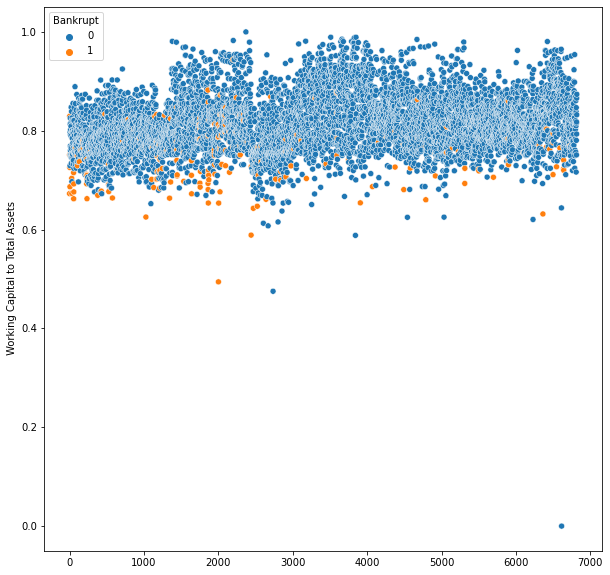

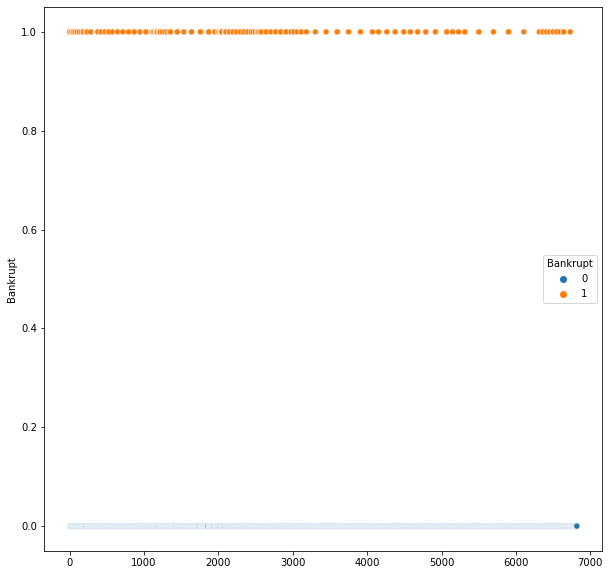

In [27]:

for i in analyse_data.columns:
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=analyse_data.index , y=f'{i}', hue = 'Bankrupt', data=analyse_data)
    plt.show()    


# Model Building

In [23]:
x.shape

(6819, 94)

In [24]:
y.shape

(6819,)

# 1) Anomoly Detection Techniques

In [25]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [26]:
df_1['Bankrupt'].value_counts()


0    6599
1     220
Name: Bankrupt, dtype: int64

In [27]:
outlier_fraction = 220/6599
outlier_fraction

0.03333838460372784

# Evaluation_Report

In [39]:
from mlxtend.plotting import plot_confusion_matrix

def evaluation_report(y_test,y_pred):
    cf_matrix = confusion_matrix(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred,average='macro')
    auc = roc_auc_score(y_test,y_pred)
    print('Precison : %.2f' %precision)
    print('Recall : %.2f' %recall)
    print('F1_Score : %.2f'  %f1)
    print('roc_auc_score : %.2f'  %auc)
    print('Confusion Matrix:')
    #import seaborn as sns
    # Normalise
    #cmn = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
    #sns.heatmap(cmn, annot=True,fmt='.2f',cmap='Blues')
    fig, ax = plot_confusion_matrix(conf_mat=cf_matrix, figsize=(4, 4))
    plt.show()


Isolation Forest
Precison : 0.16
Recall : 0.16
F1_Score : 0.57
roc_auc_score : 0.57
Confusion Matrix:


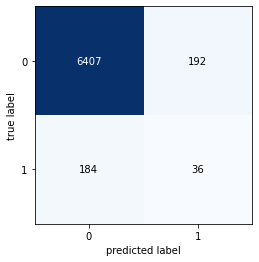

***********************************
Local Outlier Factor
Precison : 0.05
Recall : 0.05
F1_Score : 0.51
roc_auc_score : 0.51
Confusion Matrix:


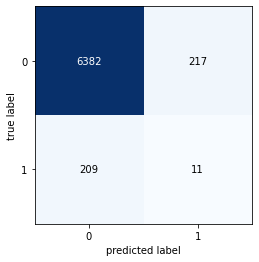

***********************************
One Class SVM
Precison : 0.03
Recall : 0.51
F1_Score : 0.36
roc_auc_score : 0.50
Confusion Matrix:


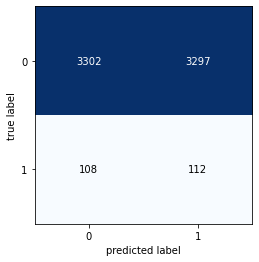

***********************************


In [28]:
Classification = {"Isolation Forest" : IsolationForest(max_samples=len(columns),
                                                     contamination=outlier_fraction),
                 
                 "Local Outlier Factor" : LocalOutlierFactor(contamination=outlier_fraction),
                 
                 "One Class SVM" : OneClassSVM()}


for i, (clf_name, clf) in enumerate(Classification.items()):
    if clf_name =='Local Outlier Factor' :
        y_pred = clf.fit_predict(x)
        score_prediction = clf.negative_outlier_factor_
        
    elif clf_name =='One Class SVM' :
        clf.fit(x)
        y_pred = clf.predict(x)
        
    else:
        clf.fit(x)
        score_prediction = clf.decision_function(x)
        y_pred = clf.predict(x)
        
    y_pred[y_pred==1] = 0
    y_pred[y_pred==-1] = 1
    #n_error = (y_pred !=target).sum()
    print(clf_name)
    evaluation_report(y,y_pred)
    print('*******'*5)
    

In [28]:
from tabulate import tabulate
print(tabulate([['Isolation Forest',0.16,0.16,0.57,0.57],
               ['Local Outlier Factor', 0.05, 0.05, 0.51,0.51],
               ['One class svm', 0.03, 0.51, 0.36, 0.50]],               
               
headers=['Model','Precision','Recall','F1_Score','AUC_score'], tablefmt='grid'))

+----------------------+-------------+----------+------------+-------------+
| Model                |   Precision |   Recall |   F1_Score |   AUC_score |
+======================+=============+==========+============+=============+
| Isolation Forest     |        0.16 |     0.16 |       0.57 |        0.57 |
+----------------------+-------------+----------+------------+-------------+
| Local Outlier Factor |        0.05 |     0.05 |       0.51 |        0.51 |
+----------------------+-------------+----------+------------+-------------+
| One class svm        |        0.03 |     0.51 |       0.36 |        0.5  |
+----------------------+-------------+----------+------------+-------------+


# 2) Building models with imbalance.

In [32]:
#Selecting features wit RF
rf = RandomForestClassifier(n_estimators=200,criterion='gini',class_weight='balanced',random_state= 21,n_jobs=-1)
rf.fit(x,y)
imp_f = pd.DataFrame(rf.feature_importances_)
imp_f
imp_f = pd.concat([pd.DataFrame(x.columns),imp_f],axis=1)
imp_f.columns = ['Features','imp']
imp_f
#sort decending order
imp_f = imp_f.sort_values(by='imp',ascending=False)
imp_f = imp_f.head(30)
features = list(imp_f['Features'])
features

[' Persistent EPS in the Last Four Seasons',
 ' Continuous interest rate (after tax)',
 ' Net Income to Total Assets',
 ' Borrowing dependency',
 ' Retained Earnings to Total Assets',
 ' Total income/Total expense',
 ' Per Share Net profit before tax (Yuan �',
 ' Net profit before tax/Paid-in capital',
 ' Equity to Liability',
 ' Total debt/Total net worth',
 ' Debt ratio %',
 ' ROA(B) before interest and depreciation after tax',
 ' Net worth/Assets',
 ' Quick Ratio',
 ' ROA(C) before interest and depreciation before interest',
 ' Net Value Growth Rate',
 ' Interest Expense Ratio',
 ' Non-industry income and expenditure/revenue',
 ' ROA(A) before interest and % after tax',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 " Net Income to Stockholder's Equity",
 ' Net Value Per Share (B)',
 ' Liability to Equity',
 ' Interest-bearing debt interest rate',
 ' Interest Coverage Ratio (Interest expense to EBIT)',
 ' Degree of Financial Leverage (DFL)',
 ' Net Value Per Share 

In [33]:
df_new = df_1.copy()

In [34]:
x_n = df_new[features]
y_n = df_new['Bankrupt']

In [35]:
print(x_n.shape)
print(y_n.shape)

(6819, 30)
(6819,)


In [36]:
x_n.head(1)

Persistent EPS in the Last Four Seasons  \
0                                  0.169141   

    Continuous interest rate (after tax)   Net Income to Total Assets  \
0                               0.780985                     0.716845   

    Borrowing dependency   Retained Earnings to Total Assets  \
0               0.390284                            0.903225   

    Total income/Total expense   Per Share Net profit before tax (Yuan �  \
0                     0.002022                                  0.138736   

    Net profit before tax/Paid-in capital   Equity to Liability  \
0                                0.137757              0.016469   

    Total debt/Total net worth   Debt ratio %  \
0                     0.021266       0.207576   

    ROA(B) before interest and depreciation after tax   Net worth/Assets  \
0                                            0.40575            0.792424   

    Quick Ratio   ROA(C) before interest and depreciation before interest  \
0      0.001208                                           0.370594          

    Net Value Growth Rate   Interest Expense Ratio  \
0                0.000327                 0.629951   

    Non-industry income and expenditure/revenue  \
0                                      0.302646   

    ROA(A) before interest and % after tax   Pre-tax net Interest Rate  \
0                                 0.424389                    0.796887   

    After-tax net Interest Rate   Net Income to Stockholder's Equity  \
0                      0.808809                              0.82789   

    Net Value Per Share (B)   Liability to Equity  \
0                   0.14795              0.290202   

    Interest-bearing debt interest rate  \
0                              0.000725   

    Interest Coverage Ratio (Interest expense to EBIT)  \
0                                            0.56405     

    Degree of Financial Leverage (DFL)   Net Value Per Share (A)  \
0                             0.026601                   0.14795   

    Allocation rate per person   Inventory/Working Capital  
0                     0.037135                     0.27692

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_n,y_n,test_size=0.25, stratify=y)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

# Logistic Regression

Precison : 0.17
Recall : 0.85
F1_Score : 0.60
roc_auc_score : 0.86
Confusion Matrix:


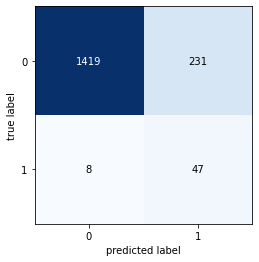

In [157]:
lr = LogisticRegression(penalty =  'l2', solver= 'lbfgs', class_weight = 'balanced')
model =lr.fit(x_train_scaled, y_train)
y_pred_train_lr = model.predict(x_train_scaled)
y_pred_test_lr = model.predict(x_test_scaled)
evaluation_report(y_test,y_pred_test_lr)
#evaluation_report(y_train,y_pred_train_lr)

In [159]:
;print(confusion_matrix(y_test,y_pred_test_lr))

[[1419  231]
 [   8   47]]


In [160]:
print(precision_score(y_test,y_pred_test_lr))

0.16906474820143885


In [161]:
47/(47+8)

0.8545454545454545

# SVC

Precison : 0.15
Recall : 0.73
F1_Score : 0.59
roc_auc_score : 0.80
Confusion Matrix:


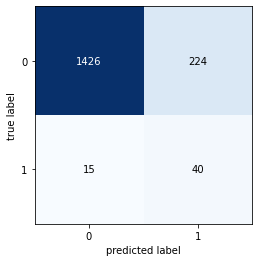

Precison : 0.18
Recall : 0.90
F1_Score : 0.62
roc_auc_score : 0.88
Confusion Matrix:


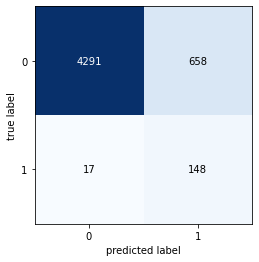

In [40]:
svc = SVC(probability=True, kernel='rbf',class_weight='balanced')
model_svc = svc.fit(x_train_scaled, y_train)
y_pred_train_svc = model_svc.predict(x_train_scaled)
y_pred_test_svc = model_svc.predict(x_test_scaled)
evaluation_report(y_test,y_pred_test_svc)

# KNN

Precison : 0.70
Recall : 0.13
F1_Score : 0.60
roc_auc_score : 0.56
Confusion Matrix:


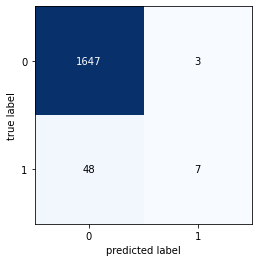

In [149]:
knn = KNeighborsClassifier(n_neighbors=15,weights='uniform')
knn_model = knn.fit(x_train_scaled,y_train)
y_pred_test_knn = knn_model.predict(x_test_scaled)
evaluation_report(y_test,y_pred_test_knn)

# XGBoost

Precison : 0.35
Recall : 0.40
F1_Score : 0.68
roc_auc_score : 0.69
Confusion Matrix:


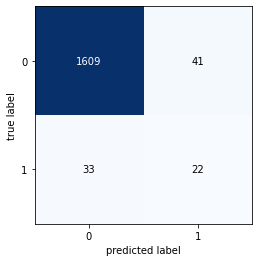

In [146]:
xgb = XGBClassifier(n_estimators = 250)
xgb.fit(x_train_scaled, y_train)
y_pred_train_xgb = xgb.predict(x_train_scaled)
y_pred_test_xgb = xgb.predict(x_test_scaled)
evaluation_report(y_test,y_pred_test_xgb)

# AdaBoost

Precison : 0.23
Recall : 0.55
F1_Score : 0.64
roc_auc_score : 0.74
Confusion Matrix:


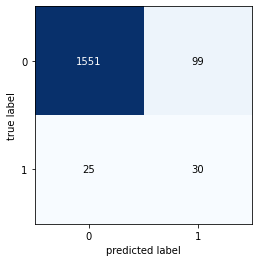

In [113]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
model_abc = abc.fit(x_train_scaled,y_train)
y_pred_test_abc = model_abc.predict(x_test_scaled)
evaluation_report(y_test,y_pred_test_abc)

In [29]:
from tabulate import tabulate
print(tabulate([['Logistic Regression',0.17, 0.85, 0.60, 0.86],
                ['SVC', 0.14, 0.76, 0.57, 0.80],
                ['KNN', 0.70,0.13,0.60,0.56],
                ['XGBoost', 0.35, 0.40, 0.68, 0.69],
                ['AdaBooast', 0.23, 0.55, 0.64, 0.74]],
               
               
headers=['Model','Precision','Recall','F1_Score','AUC_score'], tablefmt='grid'))

+---------------------+-------------+----------+------------+-------------+
| Model               |   Precision |   Recall |   F1_Score |   AUC_score |
+=====================+=============+==========+============+=============+
| Logistic Regression |        0.17 |     0.85 |       0.6  |        0.86 |
+---------------------+-------------+----------+------------+-------------+
| SVC                 |        0.14 |     0.76 |       0.57 |        0.8  |
+---------------------+-------------+----------+------------+-------------+
| KNN                 |        0.7  |     0.13 |       0.6  |        0.56 |
+---------------------+-------------+----------+------------+-------------+
| XGBoost             |        0.35 |     0.4  |       0.68 |        0.69 |
+---------------------+-------------+----------+------------+-------------+
| AdaBooast           |        0.23 |     0.55 |       0.64 |        0.74 |
+---------------------+-------------+----------+------------+-------------+


# Functions to find best model

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
def getBestLogisticRegression(x_train, y_train):
    
    lg_model = LogisticRegression(random_state=42)
    params_lg = {'solver' : ['lbfgs'] ,
                 'penalty':['l2']}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)
   
    grid_search_lg = GridSearchCV(estimator=lg_model, param_grid=params_lg, cv=cv, scoring='roc_auc')
    grid_search_lg.fit(x_train, y_train)
    #model_lg = grid_result_lg.best_estimator_
    #y_pred_test_lg = model_lg.predict(x_test)
    #y_pred_train_lg = model_lg.predict(x_train)
    print('Best Parameters : ', grid_search_lg.best_params_)
    print('Best Estimator after hyper-parameter tuning : ', grid_search_lg.best_estimator_)
    
    #evaluation_report('Logistic_reg',y_train, y_pred_train_lg,y_test,y_pred_test_lg)

#DecisionTree
def getBestDecisionTree(x_train,y_train):
        dt_model = DecisionTreeClassifier(random_state=201)


        params_dt = {'min_samples_split' : [10,20,30,40],
                      'max_depth' : [10,15,20,30,40,45,50],
                      'criterion' :['gini', 'entropy']
                     }
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)
       
        grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=params_dt, cv=cv,scoring='roc_auc', verbose=True)
        grid_search_dt.fit(x_train, y_train)
        #y_pred = grid_search.predict(x_test)

        print('Best Parameters : ', grid_search_dt.best_params_)
        print('Best Estimator after hyper-parameter tuning : ', grid_search_dt.best_estimator_)
    


#Random Forest

def getBestRandomForest(x_train,y_train):
    
    rf_model = RandomForestClassifier(random_state=42)
    
    params_rf = {'n_estimators' : [100,150,200,250,300] , 'criterion':['gini','entropy'] }
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)

    grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=params_rf, cv=cv, scoring='roc_auc')   
    grid_search_rf.fit(x_train, y_train)
    #model_rf = grid_result_rf.best_estimator_
    #y_pred_test_rf = model_rf.predict(x_test)
    #y_pred_train_rf = model_rf.predict(x_train)
    
    print('Best Parameters : ', grid_search_rf.best_params_)
    print('Best Estimator after hyper-parameter tuning : ', grid_search_rf.best_estimator_)
    


def getBestKNN(x_train,y_train):
    
    knn_model = KNeighborsClassifier()
    params_knn = {'weights' : ['uniform','distance'],
                  'n_neighbors': [2, 5,10,15,20,30,50,100,200]}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)

    grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=params_knn, cv=cv, scoring='roc_auc')   
    grid_search_knn.fit(x_train, y_train)
    
    print('Best Parameters : ', grid_search_knn.best_params_)
    print('Best Estimator after hyper-parameter tuning : ', grid_search_knn.best_estimator_)
    

    
def getBestSVC(x_train,y_train):
    
    svc_model = SVC(random_state=214)
    params_svc = {'C': [0.1, 1, 10, 100]}
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)

    grid_search_svc = GridSearchCV(estimator=svc_model, param_grid=params_svc, cv=cv, scoring='roc_auc')   
    grid_search_svc.fit(x_train, y_train)
    
    print('Best Parameters : ', grid_search_svc.best_params_)
    print('Best Estimator after hyper-parameter tuning : ', grid_search_svc.best_estimator_)

    
def getBestXGBoost(x_train,y_train):
    xg_model = XGBClassifier(random_state=42)
    
    params_xgb = {'n_estimators' : [100,150,200,250] }
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)
    
    grid_search_xgb = GridSearchCV(estimator=xg_model, param_grid=params_xgb, cv=cv, scoring='roc_auc')   
    grid_search_xgb.fit(x_train, y_train)
    #model_rf = grid_result_rf.best_estimator_
    #y_pred_test_rf = model_rf.predict(x_test)
    #y_pred_train_rf = model_rf.predict(x_train)
    
    print('Best Parameters : ', grid_search_xgb.best_params_)
    print('Best Estimator after hyper-parameter tuning : ', grid_search_xgb.best_estimator_)
    


    
    


# 3) Feature Selection using PCA and sampling using SMOTE

In [ ]:
x  = df_1.drop(['Bankrupt'])

In [ ]:
#with PCA -99% of variance
#pca = PCA().fit(x_scaler)
pca = PCA(n_components=0.99).fit(x)
print(f'n_component for 99% variance : {pca.n_components_}')


In [116]:
x_pca = PCA(11).fit_transform(x) 


In [117]:
x_pca.shape

(6819, 11)

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x_pca,y,test_size=0.25, random_state=42 )


In [120]:
#Scaling
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [121]:
print('Banktrupt :',sum(y_train==1))
print('Non-Banktrupt :',sum(y_train==0))


Banktrupt : 162
Non-Banktrupt : 4952


In [122]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [123]:
print('Banktrupt :',sum(y_train_smote==1))
print('Non-Banktrupt :',sum(y_train_smote==0))


Banktrupt : 4952
Non-Banktrupt : 4952


# Logistic_Regresion (SMOTE)

In [263]:
getBestLogisticRegression(x_train_smote,y_train_smote)

Best Parameters :  {'penalty': 'l2', 'solver': 'lbfgs'}
Best Estimator after hyper-parameter tuning :  LogisticRegression(random_state=42)


Precison : 0.16
Recall : 0.86
F1_Score : 0.59
roc_auc_score : 0.85
Confusion Matrix:


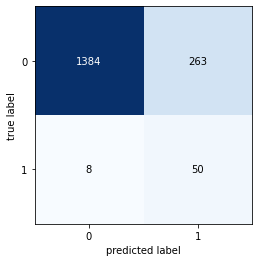

In [264]:
lr = LogisticRegression(penalty =  'l2', solver= 'lbfgs')
lr.fit(x_train_smote, y_train_smote)
y_pred_train = lr.predict(x_train_smote)
y_pred_test = lr.predict(x_test)
evaluation_report(y_test,y_pred_test)

# Decision Tree (SMOTE)

In [200]:
getBestDecisionTree(x_train_smote,y_train_smote)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best Parameters :  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}
Best Estimator after hyper-parameter tuning :  DecisionTreeClassifier(max_depth=10, max_features='auto', random_state=201)


Precison : 0.15
Recall : 0.66
F1_Score : 0.58
roc_auc_score : 0.76
Confusion Matrix:


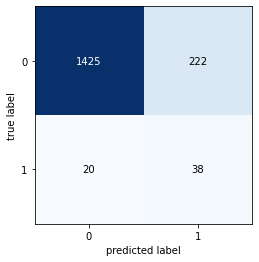

In [268]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth =  10, max_features = 'auto')
dt.fit(x_train_smote, y_train_smote)
y_pred_train_dt = dt.predict(x_train)
y_pred_test_dt = dt.predict(x_test)
evaluation_report(y_test,y_pred_test_dt)

# KNN (SMOTE)

In [267]:
getBestKNN(x_train_smote, y_train_smote)

Best Parameters :  {'n_neighbors': 20, 'weights': 'distance'}
Best Estimator after hyper-parameter tuning :  KNeighborsClassifier(n_neighbors=20, weights='distance')


Precison : 0.14
Recall : 0.64
F1_Score : 0.58
roc_auc_score : 0.75
Confusion Matrix:


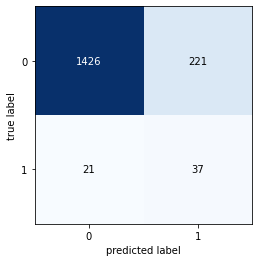

In [272]:
knn = KNeighborsClassifier(n_neighbors = 15, weights = 'distance')
knn.fit(x_train_smote, y_train_smote)
y_pred_train_knn = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)
evaluation_report(y_test,y_pred_test_knn)

# SVC (SMOTE)

In [48]:
getBestSVC(x_train_smote, y_train_smote)

Best Parameters :  {'C': 100}
Best Estimator after hyper-parameter tuning :  SVC(C=100, random_state=214)


Precison : 0.15
Recall : 0.78
F1_Score : 0.58
roc_auc_score : 0.81
Confusion Matrix:


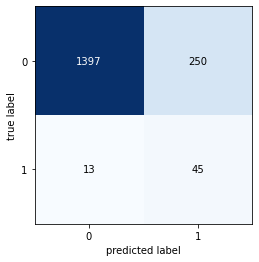

In [273]:
svc = SVC(kernel='rbf',C = 10, probability=True)
svc.fit(x_train_smote, y_train_smote)
y_pred_train_svc = svc.predict(x_train)
y_pred_test_svc = svc.predict(x_test)
evaluation_report(y_test,y_pred_test_svc)

# XGBoost (SMOTE)

In [67]:
getBestXGBoost(x_train_smote, y_train_smote)

Best Parameters :  {'n_estimators': 250}
Best Estimator after hyper-parameter tuning :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)


Precison : 0.25
Recall : 0.48
F1_Score : 0.65
roc_auc_score : 0.72
Confusion Matrix:


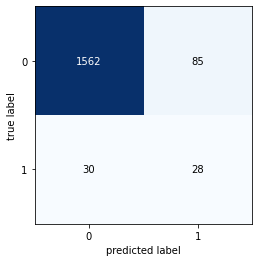

In [274]:
xgb = XGBClassifier(n_estimators = 250)
xgb.fit(x_train_smote, y_train_smote)
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)
evaluation_report(y_test,y_pred_test_xgb)

# Naive Bayes (SMOTE)

Precison : 0.07
Recall : 0.97
F1_Score : 0.43
roc_auc_score : 0.77
Confusion Matrix:


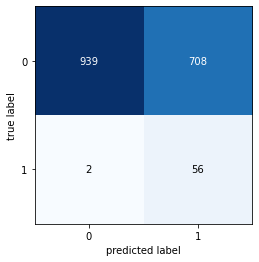

In [276]:
gnb = GaussianNB().fit(x_train_smote,y_train_smote)
y_pred_test_gnb = gnb.predict(x_test)
evaluation_report(y_test,y_pred_test_gnb)


In [30]:
from tabulate import tabulate
print(tabulate([['Logistic Regression',0.16, 0.86, 0.59, 0.85],
                ['Decision tree', 0.15, 0.66, 0.58, 0.76],
                ['SVC', 0.15, 0.78, 0.58, 0.81],
                ['KNN', 0.14,0.64,0.58,0.75],.0
                ['XGBoost', 0.25, 0.48, 0.65, 0.72],
                ['Naive Bayes', 0.07, 0.97, 0.43, 0.77]],
               
               
headers=['Model','Precision','Recall','F1_Score','AUC_score'], tablefmt='grid'))

+---------------------+-------------+----------+------------+-------------+
| Model               |   Precision |   Recall |   F1_Score |   AUC_score |
+=====================+=============+==========+============+=============+
| Logistic Regression |        0.16 |     0.86 |       0.59 |        0.85 |
+---------------------+-------------+----------+------------+-------------+
| Decision tree       |        0.15 |     0.66 |       0.58 |        0.76 |
+---------------------+-------------+----------+------------+-------------+
| SVC                 |        0.15 |     0.78 |       0.58 |        0.81 |
+---------------------+-------------+----------+------------+-------------+
| KNN                 |        0.14 |     0.64 |       0.58 |        0.75 |
+---------------------+-------------+----------+------------+-------------+
| XGBoost             |        0.25 |     0.48 |       0.65 |        0.72 |
+---------------------+-------------+----------+------------+-------------+
| Naive Baye

Logistic Regression had High Recall and High AUC_Score

# 4) Selecting features from RF and apllied SMOTETOMEK

In [127]:
x = df_1.drop(['Bankrupt'], axis=1)
y = df_1['Bankrupt']

In [130]:
#Selecting features wit RF
rf = RandomForestClassifier(n_estimators=200,criterion='gini',class_weight='balanced',random_state= 21,n_jobs=-1)
rf.fit(x,y)
imp_f = pd.DataFrame(rf.feature_importances_)
imp_f
imp_f = pd.concat([pd.DataFrame(x.columns),imp_f],axis=1)
imp_f.columns = ['Features','imp']
imp_f
#sort decending order
imp_f = imp_f.sort_values(by='imp',ascending=False)
imp_f = imp_f.head(30)
features = list(imp_f['Features'])
features

[' Net Income to Total Assets',
 ' Persistent EPS in the Last Four Seasons',
 ' Borrowing dependency',
 ' Continuous interest rate (after tax)',
 ' Retained Earnings to Total Assets',
 ' Total income/Total expense',
 ' Net profit before tax/Paid-in capital',
 ' Total debt/Total net worth',
 ' Debt ratio %',
 ' Per Share Net profit before tax (Yuan �',
 ' ROA(B) before interest and depreciation after tax',
 ' Equity to Liability',
 ' After-tax net Interest Rate',
 ' Net Value Growth Rate',
 ' Quick Ratio',
 ' Non-industry income and expenditure/revenue',
 ' Net worth/Assets',
 ' Degree of Financial Leverage (DFL)',
 ' Liability to Equity',
 ' Interest Expense Ratio',
 ' Net Value Per Share (B)',
 ' ROA(A) before interest and % after tax',
 ' Interest Coverage Ratio (Interest expense to EBIT)',
 ' ROA(C) before interest and depreciation before interest',
 ' Pre-tax net Interest Rate',
 " Net Income to Stockholder's Equity",
 ' Interest-bearing debt interest rate',
 ' Net Value Per Share 

In [132]:
df_new = df_1[features]
df_new.head(1)

Net Income to Total Assets   Persistent EPS in the Last Four Seasons  \
0                     0.716845                                  0.169141   

    Borrowing dependency   Continuous interest rate (after tax)  \
0               0.390284                               0.780985   

    Retained Earnings to Total Assets   Total income/Total expense  \
0                            0.903225                     0.002022   

    Net profit before tax/Paid-in capital   Total debt/Total net worth  \
0                                0.137757                     0.021266   

    Debt ratio %   Per Share Net profit before tax (Yuan �  \
0       0.207576                                  0.138736   

    ROA(B) before interest and depreciation after tax   Equity to Liability  \
0                                            0.40575               0.016469   

    After-tax net Interest Rate   Net Value Growth Rate   Quick Ratio  \
0                      0.808809                0.000327      0.001208   

    Non-industry income and expenditure/revenue   Net worth/Assets  \
0                                      0.302646           0.792424   

    Degree of Financial Leverage (DFL)   Liability to Equity  \
0                             0.026601              0.290202   

    Interest Expense Ratio   Net Value Per Share (B)  \
0                 0.629951                   0.14795   

    ROA(A) before interest and % after tax  \
0                                 0.424389   

    Interest Coverage Ratio (Interest expense to EBIT)  \
0                                            0.56405     

    ROA(C) before interest and depreciation before interest  \
0                                           0.370594          

    Pre-tax net Interest Rate   Net Income to Stockholder's Equity  \
0                    0.796887                              0.82789   

    Interest-bearing debt interest rate   Net Value Per Share (A)  \
0                              0.000725                   0.14795   

    Inventory/Working Capital   Net Value Per Share (C)  
0                     0.27692                   0.14795

In [135]:
x_n = df_new.copy()
y_n = df_1['Bankrupt']

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x_n,y_n,test_size=0.25, random_state=42 )


In [137]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')
x_smt_train, y_smt_train = smt.fit_resample(x_train, y_train)

In [138]:
#Scaling
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_smt_train)
x_test_scaled=scaler.fit_transform(x_test)


# Logistic Regression (SMOTETOMEK)

Precison : 0.07
Recall : 0.95
F1_Score : 0.42
roc_auc_score : 0.75
Confusion Matrix:


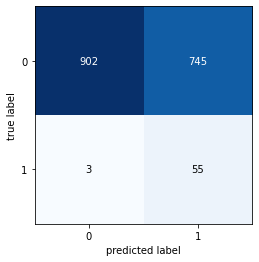

In [163]:
lr = LogisticRegression(penalty =  'l2', solver= 'liblinear')
lr.fit(x_train_scaled, y_smt_train)
y_pred_train_lr = lr.predict(x_smt_train)
y_pred_test_lr = lr.predict(x_test_scaled)
evaluation_report(y_test,y_pred_test_lr)

# RandomForest (SMOTETOMEK)

In [166]:
getBestRandomForest(x_train_scaled,y_smt_train)

Precison : 0.09
Recall : 0.90
F1_Score : 0.50
roc_auc_score : 0.80
Confusion Matrix:


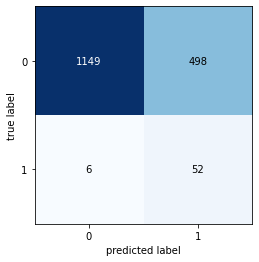

In [164]:
rf = RandomForestClassifier(criterion = 'entropy', n_estimators =  250)
rf.fit(x_train_scaled, y_smt_train)
y_pred_train_rf = rf.predict(x_smt_train)
y_pred_test_rf = rf.predict(x_test_scaled)
evaluation_report(y_test,y_pred_test_rf)


# DecisionTree (SMOTETOMEK)

In [ ]:
getBestDecisionTree(x_train_scaled,y_smt_train)

Precison : 0.08
Recall : 0.60
F1_Score : 0.50
roc_auc_score : 0.68
Confusion Matrix:


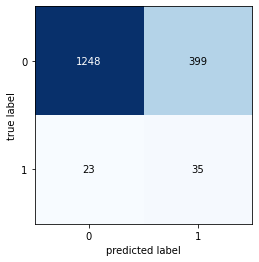

In [170]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth =  10, max_features = 'auto')
dt.fit(x_train_scaled, y_smt_train)
y_pred_train_dt = dt.predict(x_train_scaled)
y_pred_test_dt = dt.predict(x_test_scaled)
evaluation_report(y_test,y_pred_test_dt)

# KNN (SMOTETOMEK)

In [174]:
getBestKNN(x_train_scaled,y_smt_train)

Precison : 0.18
Recall : 0.93
F1_Score : 0.61
roc_auc_score : 0.89
Confusion Matrix:


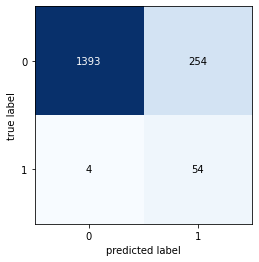

In [311]:
#knn = KNeighborsClassifier(n_neighbors = 15, weights = 'distance')
knn = KNeighborsClassifier(n_neighbors=2,weights='uniform')
knn.fit(x_train_scaled, y_smt_train)
y_pred_train_knn = knn.predict(x_train_scaled)
y_pred_test_knn = knn.predict(x_test_scaled)
evaluation_report(y_test,y_pred_test_knn)

# SVC (SMOTETOMEK)

In [ ]:
getBestSVC(x_train_scaled, y_smt_train)

Precison : 0.06
Recall : 0.79
F1_Score : 0.41
roc_auc_score : 0.68
Confusion Matrix:


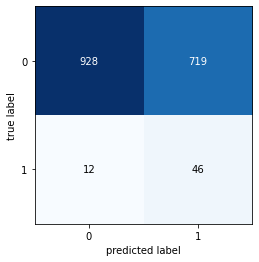

In [175]:
svc = SVC(kernel='rbf',C = 10, probability=True)
svc.fit(x_train_scaled, y_smt_train)
y_pred_train_svc = svc.predict(x_train_scaled)
y_pred_test_svc = svc.predict(x_test_scaled)
evaluation_report(y_test,y_pred_test_svc)

# XGBoost (SMOTETOMEK)

In [ ]:
getBestXGBoost(x_train_scaled, y_train_smote)

Precison : 0.09
Recall : 0.95
F1_Score : 0.49
roc_auc_score : 0.81
Confusion Matrix:


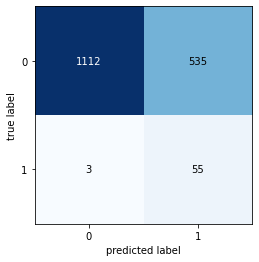

In [176]:
xgb = XGBClassifier(n_estimators = 250)
xgb.fit(x_train_scaled, y_smt_train)
y_pred_train_xgb = xgb.predict(x_train_scaled)
y_pred_test_xgb = xgb.predict(x_test_scaled)
evaluation_report(y_test,y_pred_test_xgb)

# AdaBoost (SMOTETOMEK)

Precison : 0.07
Recall : 0.98
F1_Score : 0.40
roc_auc_score : 0.75
Confusion Matrix:


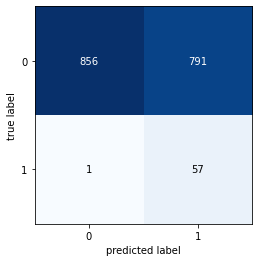

In [167]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(x_train_scaled,y_smt_train)
y_pred_test_abc = abc.predict(x_test_scaled)
evaluation_report(y_test,y_pred_test_abc)


In [31]:
from tabulate import tabulate
print(tabulate([['Logistic Regression',0.07, 0.95, 0.42, 0.75],
                ['Decision tree', 0.08, 0.60, 0.50, 0.68],                
                ['RandomForest tree', 0.09, 0.90, 0.50, 0.80],
                ['SVC', 0.06, 0.79, 0.41, 0.68],
                ['KNN', 0.18,0.93,0.61,0.89],
                ['XGBoost', 0.09, 0.95, 0.49, 0.81],
                ['Naive Bayes', 0.07, 0.98, 0.40, 0.75]],
               
               
headers=['Model','Precision','Recall','F1_Score','AUC_score'], tablefmt='orgtbl'))

+---------------------+-------------+----------+------------+-------------+
| Model               |   Precision |   Recall |   F1_Score |   AUC_score |
+=====================+=============+==========+============+=============+
| Logistic Regression |        0.07 |     0.95 |       0.42 |        0.75 |
+---------------------+-------------+----------+------------+-------------+
| Decision tree       |        0.08 |     0.6  |       0.5  |        0.68 |
+---------------------+-------------+----------+------------+-------------+
| RandomForest tree   |        0.09 |     0.9  |       0.5  |        0.8  |
+---------------------+-------------+----------+------------+-------------+
| SVC                 |        0.06 |     0.79 |       0.41 |        0.68 |
+---------------------+-------------+----------+------------+-------------+
| KNN                 |        0.18 |     0.93 |       0.61 |        0.89 |
+---------------------+-------------+----------+------------+-------------+
| XGBoost   

# Best Models taken from 4 approaches

In [42]:
from tabulate import tabulate
print(tabulate([['Logistic Regression with Imbalance',0.17, 0.85, 0.60, 0.86],
                ['Logistic Regression with PCA and SMOTE', 0.16, 0.86, 0.59, 0.85],                
                ['KNN with SMOTETOMEK', 0.18,0.93,0.61,0.89]],
               
               
headers=['Model','Precision','Recall','F1_Score','AUC_score'], tablefmt='grid'))

+----------------------------------------+-------------+----------+------------+-------------+
| Model                                  |   Precision |   Recall |   F1_Score |   AUC_score |
+========================================+=============+==========+============+=============+
| Logistic Regression with Imbalance     |        0.17 |     0.85 |       0.6  |        0.86 |
+----------------------------------------+-------------+----------+------------+-------------+
| Logistic Regression with PCA and SMOTE |        0.16 |     0.86 |       0.59 |        0.85 |
+----------------------------------------+-------------+----------+------------+-------------+
| KNN with SMOTETOMEK                    |        0.18 |     0.93 |       0.61 |        0.89 |
+----------------------------------------+-------------+----------+------------+-------------+


# MODEL SELECTION

# From above 3 models KNN model had high recall and high auc_score